<a href="https://colab.research.google.com/github/Temple2001/ML_practice/blob/main/codes/DeepLearning_practice_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 7
**DataGeneration class를 이용한 Wine 구현**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

np.random.seed(0)

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = float(tmp_val) - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [2]:
class Wine:

    def __init__(self, name, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.name = name

        self.W2 = np.random.rand(input_nodes, hidden_nodes)
        self.b2 = np.random.rand(hidden_nodes)

        self.W3 = np.random.rand(hidden_nodes, output_nodes)
        self.b3 = np.random.rand(output_nodes)

        self.learning_rate = learning_rate

        print(self.name, ' is created !!!')
    
    def feed_forward(self):
        delta = 1e-7

        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)

        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)

        return -np.sum(self.target_data*np.log(y+delta)+(1-self.target_data)*np.log((1-y)+delta))
    
    def loss_val(self):
        delta = 1e-7

        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)

        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)

        return -np.sum(self.target_data*np.log(y+delta)+(1-self.target_data)*np.log((1-y)+delta))
    
    def predict(self, input_data):
        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)

        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)

        if y >= 0.5:
            result = 1
        else:
            result = 0
        
        return y, result
    
    def accuracy(self, input_data, target_data):
        matched_list = []
        not_matched_list = []

        for index in range(len(input_data)):
            (real_val, logical_val) = self.predict(input_data[index])

            if logical_val == target_data[index]:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
            
        accuracy_val = len(matched_list) / len(input_data)

        return accuracy_val
    
    def train(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data

        f = lambda x : self.feed_forward()

        self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
        
        self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)

        self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)

        self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)

In [3]:
class DataGeneration:

    def __init__(self, name, file_path, seperation_rate):
        self.name = name
        self.file_path = file_path
        self.seperation_rate = seperation_rate

    def generate(self):
        try:
            loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
        except Exception as err:
            print('[DataGeneration::generate()]  ', str(err))
            raise Exception(str(err))
        
        print('[DataGeneration] loaded_data.shape = ', loaded_data.shape)

        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data)*self.seperation_rate)

        np.random.shuffle(loaded_data)

        test_data = loaded_data[0:test_data_num]
        training_data = loaded_data[test_data_num:]

        return training_data, test_data

In [4]:
seperation_rate = 0.3

data_obj = DataGeneration('Wine', 'wine.csv', seperation_rate)

(training_data, test_data) = data_obj.generate()

print('training_data.shape = ', training_data.shape, ', test_data.shape = ', test_data.shape)

[DataGeneration] loaded_data.shape =  (6497, 13)
training_data.shape =  (4548, 13) , test_data.shape =  (1949, 13)


In [5]:
i_nodes = training_data.shape[1] - 1
h_nodes = 5
o_nodes = 1
lr = 1e-4
epochs = 20

loss_val_list = []

obj = Wine('Wine', i_nodes, h_nodes, o_nodes, lr)

print('Neural Network Learning using Numerical Derivative...')

start_time = datetime.now()

for step in range(epochs):
    for index in range(len(training_data)):
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]

        obj.train(input_data, target_data)
    
    cur_loss_val = obj.loss_val()
    print('epochs = ', step, ', loss value = ', cur_loss_val)
    loss_val_list.append(cur_loss_val)

end_time = datetime.now()

print('')
print('Elapsed time => ', end_time - start_time)

Wine  is created !!!
Neural Network Learning using Numerical Derivative...
epochs =  0 , loss value =  2.4006252417349194
epochs =  1 , loss value =  1.1528702751754023
epochs =  2 , loss value =  0.6385749256994794
epochs =  3 , loss value =  0.44982422470911004
epochs =  4 , loss value =  0.3693348188931222
epochs =  5 , loss value =  0.33000426445956327
epochs =  6 , loss value =  0.30907843319397954
epochs =  7 , loss value =  0.29736937322756163
epochs =  8 , loss value =  0.2906196356456617
epochs =  9 , loss value =  0.2866593637858567
epochs =  10 , loss value =  0.2843111312785565
epochs =  11 , loss value =  0.2829099373951938
epochs =  12 , loss value =  0.28207066995651836
epochs =  13 , loss value =  0.2815668316418929
epochs =  14 , loss value =  0.2812639473474054
epochs =  15 , loss value =  0.28108171717275116
epochs =  16 , loss value =  0.28097202405974414
epochs =  17 , loss value =  0.2809059747582487
epochs =  18 , loss value =  0.2808661974608821
epochs =  19 , l

<function matplotlib.pyplot.show>

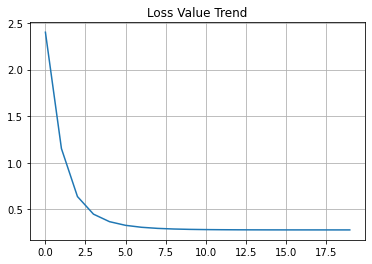

In [6]:
plt.title('Loss Value Trend')
plt.grid()
plt.plot(loss_val_list)

plt.show

In [7]:
test_input_data = test_data[:,0:-1]
test_target_data = test_data[:,-1]

accuracy_ret = obj.accuracy(test_input_data, test_target_data)

print('Accuracy => ', accuracy_ret)

Accuracy =>  0.7547460236018471
